In [21]:
from MAUtil import *
from MAInit import *
from MACalc import *
from MAPost import *
import re
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [22]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

In [23]:
db = client.adsE_database
collection = db.adsE_collection

### prepare data for prediction ###

In [24]:
elements = ['Ag', 'Al', 'Au', 'Cu', 'Pt', 'Pd', 'Ni', 'Rh']
faces = ['100', '111', '110', '211']

dictlis = []

for ele in elements:
    for face in faces:
        dicte = {'element':ele, 'face':face}
        dictlis.append(dicte)

dictlis.append({'element':'Ru', 'face':'001'})
dictlis.append({'element':'Zn', 'face':'001'})

dictlis.append({'element':'CoPt3', 'face':'100'})
dictlis.append({'element':'GaNi', 'face':'110'})

In [25]:
inst = []
dfall = []
df = []
dfpred = []

for i in range(len(dictlis)):
    try:
        du = dataset_utilizer(**dictlis[i])
        inst.append(du)
        dfall.append(du.dfall)
        df.append(du.df)
        dfpred.append(du.dfpred)
    except:
        print('Error: {0}'.format(dictlis[i]))

Error: {'element': 'Ag', 'face': '100'}
Error: {'element': 'Ag', 'face': '111'}
Error: {'element': 'Ag', 'face': '110'}
Error: {'element': 'Ag', 'face': '211'}
Error: {'element': 'Al', 'face': '100'}
Error: {'element': 'Al', 'face': '111'}
Error: {'element': 'Al', 'face': '110'}
Error: {'element': 'Al', 'face': '211'}
Error: {'element': 'Cu', 'face': '100'}
Error: {'element': 'Cu', 'face': '111'}
Error: {'element': 'Cu', 'face': '110'}
Error: {'element': 'Cu', 'face': '211'}
Error: {'element': 'Pt', 'face': '100'}
Error: {'element': 'Pt', 'face': '111'}
Error: {'element': 'Pt', 'face': '110'}
Error: {'element': 'Pt', 'face': '211'}
Error: {'element': 'Pd', 'face': '100'}
Error: {'element': 'Pd', 'face': '111'}
Error: {'element': 'Pd', 'face': '110'}
Error: {'element': 'Pd', 'face': '211'}
Error: {'element': 'Ni', 'face': '100'}
Error: {'element': 'Ni', 'face': '111'}
Error: {'element': 'Ni', 'face': '110'}
Error: {'element': 'Ni', 'face': '211'}
Error: {'element': 'Rh', 'face': '100'}


In [26]:
### Exclude coverage > 1.0 ###
for i in range(len(dfpred)):
    dfpred[i] = dfpred[i][dfpred[i]['coverage'] <= 1.0]

### Exclude ads ene > 2.0 ###
for i in range(len(dfpred)):
    dfpred[i] = dfpred[i][dfpred[i]['aveadsE/suratom'] >= -2.0]

In [27]:
covset = []
for i in range(len(dfpred)):
    covset.append(sorted(list(set(dfpred[i]['coverage']))))
# covset

### Just show residue ####

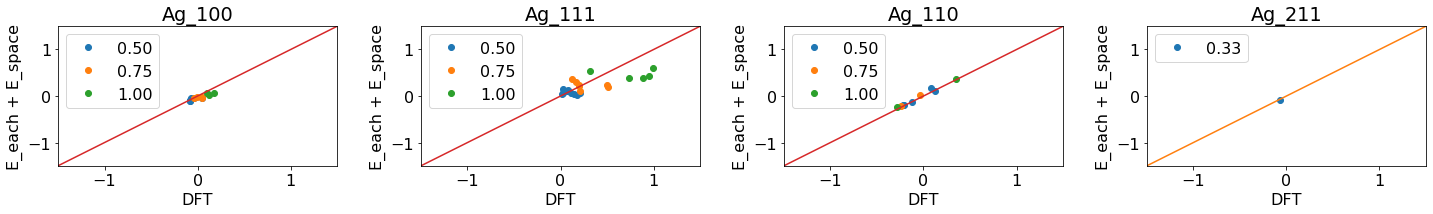

In [28]:
xrange = np.linspace(-2, 2)
# predadsene_surf, adsElis, Eint
fig = plt.figure(figsize=(20,30))
plt.rcParams["font.size"] = 16

for i in range(len(dfpred)):
    ax = fig.add_subplot(9, 4, i+1)
    xmin = 100
    xmax = -100

    for j in range(len(covset[i])):
        if not covset[i][j]:
            continue
        data = dfpred[i][dfpred[i]['coverage'] == covset[i][j]]
        aveadsE_suratom = np.array(data['aveadsE/suratom'])
        E_residue = np.array(data['E_residue/suratom'])
        E_prepred = aveadsE_suratom - E_residue
        if not aveadsE_suratom.any():
            continue
        if xmin > np.min(aveadsE_suratom):
            xmin = np.min(aveadsE_suratom)
        if xmax < np.max(aveadsE_suratom):
            xmax = np.max(aveadsE_suratom)
        ax.plot(aveadsE_suratom, E_prepred, 'o')
    ax.plot(xrange, xrange, '-')

    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    ax.set_title('{}_{}'.format(dictlis[i]['element'], dictlis[i]['face']))
#     ax.legend(['{0:.2f}'.format(item) for item in covset[i]], bbox_to_anchor=(1, 0.8))
    ax.legend(['{0:.2f}'.format(item) for item in covset[i]])
    ax.set_xlabel('DFT')
    ax.set_ylabel('E_each + E_space')
#     plt.savefig('{}_{}_predE_wCObondfix.png'.format(dictlis[i]['element'], dictlis[i]['mirror']), bbox_inches='tight')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0, right=0.95, hspace=0.5, wspace=0.3)
# plt.savefig('E_residue.png', bbox_inches='tight')
plt.show()

In [29]:
# dfall[14][dfall[14]['numberofads']==1]

In [30]:
# query('Cu_110_u2_RPBE_no004_CO_n1_d8.traj','local')

In [31]:
dfpred[0]

,index,_id,name,isvalid,ispredictable,element,face,unitlength,xc,adsorbate,numberofads,coverage,surfatomnum,E,bareE,E_ads,totaladsE,aveadsE/suratom,aveadsE/ads,E_int_space,sumE_each_ads,E_residue/suratom,area,density,igroups,rgroups,converged,is_adsorbed,kept_sites,E_not_exceeded,minimum_distance,ads_dist2,ads_dist3
0,2,5e7e2c10a222761ffba748d9,Au_100_u2_RPBE_no002_CO_n2_d3.traj,yes,yes,Au,100,2,RPBE,CO,2,0.50,4,-68.324934,-39.219824,-14.485436,-0.134238,-0.033559,-0.067119,0.254555,-0.390633,0.000460,35.236497,0.056759,"[0, 0]","[0, 0]",yes,yes,yes,yes,3,0.0,4.0
1,4,5e7e2c1da222761ffba748dd,Au_100_u2_RPBE_no003_CO_n3_d3.traj,yes,yes,Au,100,2,RPBE,CO,3,0.75,4,-82.697679,-39.219824,-14.485436,-0.021546,-0.005386,-0.007182,0.521815,-0.585950,0.010647,35.236497,0.085139,"[0, 0, 0]","[0, 0, 0]",yes,yes,yes,yes,3,0.0,8.0
2,5,5e7e2c2aa222761ffba748df,Au_100_u2_RPBE_no004_CO_n4_d3.traj,yes,yes,Au,100,2,RPBE,CO,4,1.00,4,-96.741377,-39.219824,-14.485436,0.420192,0.105048,0.105048,1.077079,-0.781266,0.031095,35.236497,0.113519,"[0, 0, 0, 0]","[0, 0, 0, 0]",yes,yes,yes,yes,3,0.0,16.0
3,6,5e7e2c38a222761ffba748e1,Au_100_u2_RPBE_no005_CO_n3_d3.traj,yes,yes,Au,100,2,RPBE,CO,3,0.75,4,-82.830269,-39.219824,-14.485436,-0.154136,-0.038534,-0.051379,0.429572,-0.597089,0.003345,35.236497,0.085139,"[1, 0, 0]","[1, 0, 0]",yes,yes,yes,yes,3,0.0,14.0
4,7,5e7e2c45a222761ffba748e3,Au_100_u2_RPBE_no006_CO_n4_d3.traj,yes,yes,Au,100,2,RPBE,CO,4,1.00,4,-96.658409,-39.219824,-14.485436,0.503160,0.125790,0.125790,0.894012,-0.803545,0.103173,35.236497,0.113519,"[1, 1, 0, 0]","[1, 1, 0, 0]",yes,yes,yes,yes,2,4.0,24.0
5,8,5e7e2c52a222761ffba748e5,Au_100_u2_RPBE_no007_CO_n2_d3.traj,yes,yes,Au,100,2,RPBE,CO,2,0.50,4,-68.525669,-39.219824,-14.485436,-0.334973,-0.083743,-0.167486,-0.011750,-0.390633,0.016853,35.236497,0.056759,"[0, 0]","[0, 0]",yes,yes,yes,yes,Over 4,0.0,0.0
6,9,5e7e2c5fa222761ffba748e7,Au_100_u2_RPBE_no008_CO_n2_d3.traj,yes,yes,Au,100,2,RPBE,CO,2,0.50,4,-68.515643,-39.219824,-14.485436,-0.324946,-0.081237,-0.162473,0.076606,-0.401772,0.000055,35.236497,0.056759,"[1, 0]","[1, 0]",yes,yes,yes,yes,3,0.0,6.0
7,10,5e7e2c6ca222761ffba748e9,Au_100_u2_RPBE_no009_CO_n3_d3.traj,yes,yes,Au,100,2,RPBE,CO,3,0.75,4,-82.477117,-39.219824,-14.485436,0.199015,0.049754,0.066338,0.429565,-0.608228,0.094420,35.236497,0.085139,"[1, 1, 0]","[1, 1, 0]",yes,yes,yes,yes,2,4.0,12.0
8,11,5e7e2c79a222761ffba748eb,Au_100_u2_RPBE_no011_CO_n2_d3.traj,yes,yes,Au,100,2,RPBE,CO,2,0.50,4,-68.516446,-39.219824,-14.485436,-0.325750,-0.081437,-0.162875,-0.011570,-0.412912,0.024683,35.236497,0.056759,"[1, 1]","[1, 1]",yes,yes,yes,yes,3,0.0,12.0
9,12,5e7e2c86a222761ffba748ed,Au_100_u2_RPBE_no012_CO_n3_d3.traj,yes,yes,Au,100,2,RPBE,CO,3,0.75,4,-82.499244,-39.219824,-14.485436,0.176889,0.044222,0.058963,0.521818,-0.619368,0.068610,35.236497,0.085139,"[1, 1, 1]","[1, 1, 1]",yes,yes,yes,yes,2,4.0,22.0


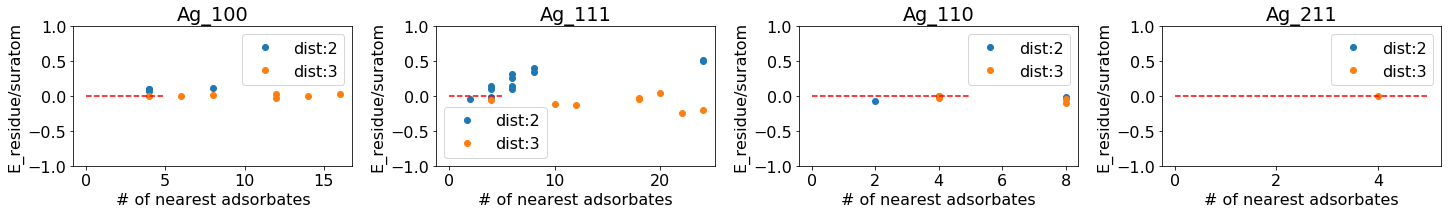

In [32]:
fig = plt.figure(figsize=(20,30))
plt.rcParams["font.size"] = 16


xmin = 0
xmax = 5
for i in range(len(dfpred)):
    ax = fig.add_subplot(9, 4, i+1)
    ax.plot(dfpred[i][dfpred[i]['minimum_distance']==2]['ads_dist2'], dfpred[i][dfpred[i]['minimum_distance']==2]['E_residue/suratom'], 'o')
    ax.plot(dfpred[i][dfpred[i]['minimum_distance']==3]['ads_dist3'], dfpred[i][dfpred[i]['minimum_distance']==3]['E_residue/suratom'], 'o')
    ax.plot([xmin,xmax],[0,0], "red", linestyle='dashed') # normal way
    ax.set_title('{}_{}'.format(dictlis[i]['element'], dictlis[i]['face']))
    ax.set_xlabel('# of nearest adsorbates')
    ax.set_ylabel('E_residue/suratom')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0, right=0.95, hspace=0.5, wspace=0.3)
    plt.legend(['dist:2','dist:3'])
# plt.savefig('')
  #  plt.xlim(xmin,xmax)
    plt.ylim(-1,1)
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

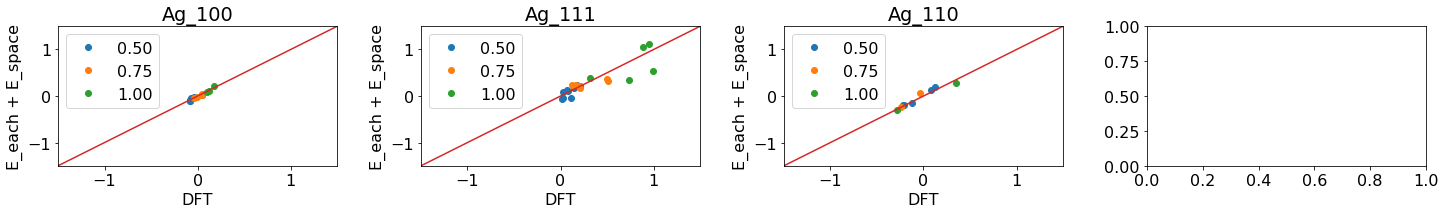

In [33]:
xrange = np.linspace(-2, 2)
# predadsene_surf, adsElis, Eint
fig = plt.figure(figsize=(20,30))
plt.rcParams["font.size"] = 16

for i in range(len(dfpred)):
    ax = fig.add_subplot(9, 4, i+1)
    xmin = 100
    xmax = -100

    for j in range(len(covset[i])):
        weight2, weight3 = inst[i].fit_weight_from_specific_element_and_face()
        data = dfpred[i][dfpred[i]['coverage'] == covset[i][j]]
        
        E_residue_pred = data['ads_dist2'] * weight2 + data['ads_dist3'] * weight3
        E_ads_pred = (data['E_int_space'] + data['sumE_each_ads'])/data['surfatomnum'] + E_residue_pred

        aveadsE_suratom = data['aveadsE/suratom']
        if not aveadsE_suratom.any():
            continue
        if xmin > np.min(aveadsE_suratom):
            xmin = np.min(aveadsE_suratom)
        if xmax < np.max(aveadsE_suratom):
            xmax = np.max(aveadsE_suratom)
        ax.plot(aveadsE_suratom, E_ads_pred, 'o')
    ax.plot(xrange, xrange, '-')

    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    ax.set_title('{}_{}'.format(dictlis[i]['element'], dictlis[i]['face']))
#     ax.legend(['{0:.2f}'.format(item) for item in covset[i]], bbox_to_anchor=(1, 0.8))
    ax.legend(['{0:.2f}'.format(item) for item in covset[i]])
    ax.set_xlabel('DFT')
    ax.set_ylabel('E_each + E_space')
#     plt.savefig('{}_{}_predE_wCObondfix.png'.format(dictlis[i]['element'], dictlis[i]['mirror']), bbox_inches='tight')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0, right=0.95, hspace=0.5, wspace=0.3)
plt.savefig('E_pred_wmf_method1.png', bbox_inches='tight')
# plt.show()

In [32]:
# dfall[14]

In [33]:
# query('Cu_110_u2_RPBE_no003_CO_n1_d8_all.traj','local')

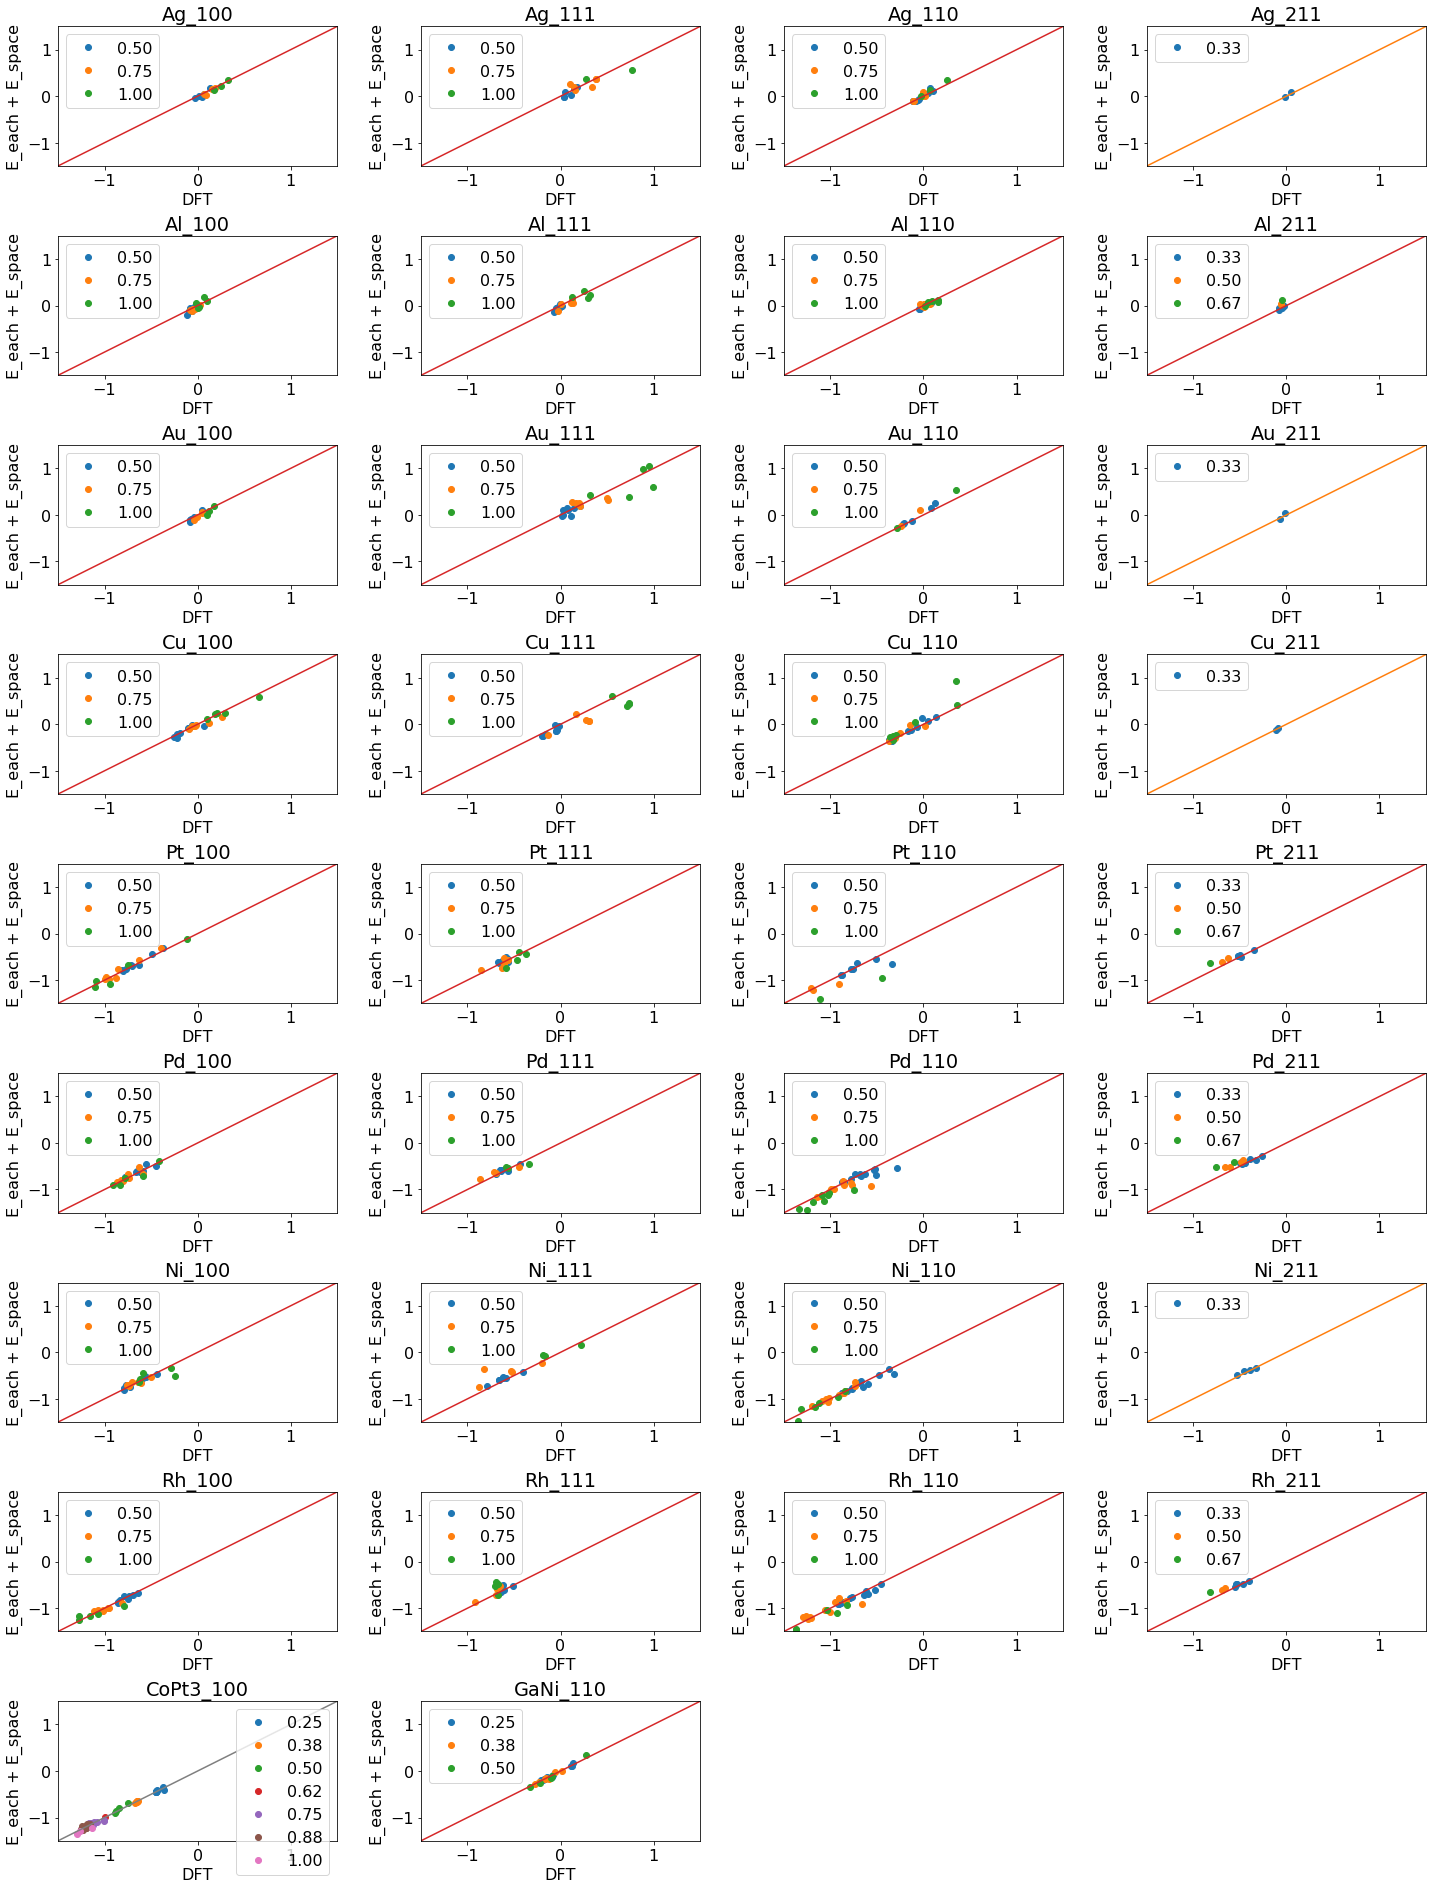

In [34]:
xrange = np.linspace(-2, 2)
# predadsene_surf, adsElis, Eint
fig = plt.figure(figsize=(20,30))
plt.rcParams["font.size"] = 16

for i in range(len(dfpred)):
    ax = fig.add_subplot(9, 4, i+1)
    xmin = 100
    xmax = -100

    for j in range(len(covset[i])):
        print
        weight2, weight3 = inst[i].fit_weight_from_specific_element()
        data = dfpred[i][dfpred[i]['coverage'] == covset[i][j]]
        
        E_residue_pred = data['ads_dist2'] * weight2 + data['ads_dist3'] * weight3
        E_ads_pred = (data['E_int_space'] + data['sumE_each_ads'])/data['surfatomnum'] + E_residue_pred

        aveadsE_suratom = data['aveadsE/suratom']
        if not aveadsE_suratom.any():
            continue
        if xmin > np.min(aveadsE_suratom):
            xmin = np.min(aveadsE_suratom)
        if xmax < np.max(aveadsE_suratom):
            xmax = np.max(aveadsE_suratom)
        ax.plot(aveadsE_suratom, E_ads_pred, 'o')
    ax.plot(xrange, xrange, '-')

    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    ax.set_title('{}_{}'.format(dictlis[i]['element'], dictlis[i]['face']))
#     ax.legend(['{0:.2f}'.format(item) for item in covset[i]], bbox_to_anchor=(1, 0.8))
    ax.legend(['{0:.2f}'.format(item) for item in covset[i]])
    ax.set_xlabel('DFT')
    ax.set_ylabel('E_each + E_space')
#     plt.savefig('{}_{}_predE_wCObondfix.png'.format(dictlis[i]['element'], dictlis[i]['mirror']), bbox_inches='tight')
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0, right=0.95, hspace=0.5, wspace=0.3)
plt.savefig('E_pred_wm_method1.png', bbox_inches='tight')
# plt.show()

In [28]:
# dfall[22]

In [29]:
# query('Pd_110_u2_RPBE_no002_CO_n1_d9.traj','local')

In [88]:
def get_adsorb_zdistance(atoms, adsorbate):
    '''
    Return maximum of minimum distance between each adsorbates and surface
    '''
    adseles = get_all_elements(adsorbate)
    baresurface, adsites = remove_adsorbate(atoms, adseles)
    mindists = []
    for pos in adsites:
        posdiff = pos - baresurface.positions
        minzdist = np.amin(posdiff, axis=0)[2]
        mindists.append(minzdist)
    maxdist = max(mindists)
    return maxdist

In [89]:
atoms = query('Pd_110_u2_RPBE_no028_CO_n4_d3.traj')
adsorbate = query('CO_RPBE.traj')

In [90]:
np.min(get_adsorb_zdistance(atoms, adsorbate))

1.1932615464275287